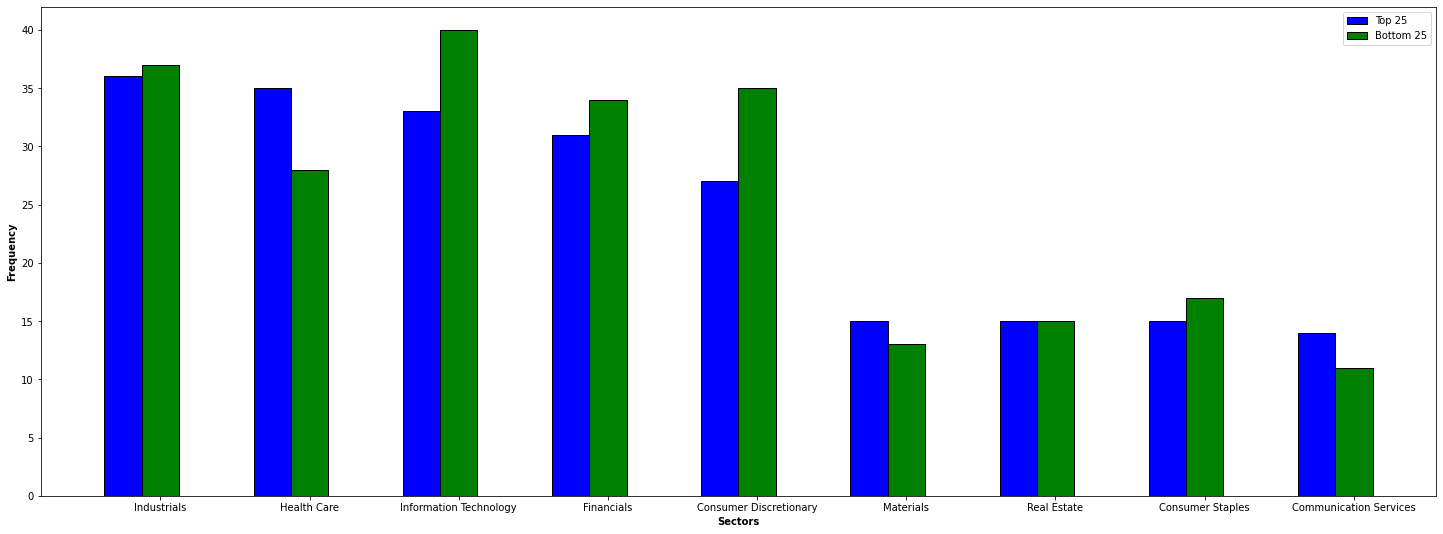

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def extract_data(sectors):
    content = requests.get(sectors).text
    soup = BeautifulSoup(content, "lxml") 
    find_table = soup.find('table', class_='wikitable sortable')
    j = 0
    full_val = []
    for link in find_table.find_all('tr'):
        j += 1
        if(j == 1):
            continue
        i = 0
        d = {}
        for ele in link.find_all('td'):
            i += 1
            if(i == 1):
                st = ele.text
                st = st[:-1]
                d['symbol'] = st
            elif(i == 4):
                d['gics_sector'] = ele.text
        full_val.append(d)
    df = pd.DataFrame(full_val)
    return full_val


def graph(val):
    dp_top = {}
    dp_bottom = {}
    top = [val[i] for i in range(len(val)//2)]
    bottom = [val[i] for i in range(len(val)//2,len(val))]
    for x in top:
        string = x['gics_sector']
        if(string in dp_top):
            dp_top[string] += 1
        else:
            dp_top[string] = 1
    for x in bottom:
        string = x['gics_sector']
        if(string in dp_bottom):
            dp_bottom[string] += 1
        else:
            dp_bottom[string] = 1
    return dp_top,dp_bottom

def bar_graph(dp_top,dp_bottom):
    dp_top = dict(sorted(dp_top.items(), key=lambda item: item[1],reverse=True)[:10])
    dp_bottom = dict(sorted(dp_bottom.items(), key=lambda item: item[1],reverse=True)[:10])
    dp_new = []
    top_new = []
    bottom_new = []
    for i in dp_top:
        if(i in dp_bottom):
            top_new.append(dp_top[i])
            bottom_new.append(dp_bottom[i])
            dp_new.append(i)
    data = []
    data.append(top_new)
    data.append(bottom_new)
    barWidth = 0.25
    fig = plt.subplots(figsize=(25,9))
    br1 = np.arange(len(top_new))
    br2 = [x + barWidth for x in br1]
    plt.bar(br1, top_new, color ='b', width = barWidth, 
        edgecolor ='black', label ='Top 25 companies') 
    plt.bar(br2, bottom_new, color ='g', width = barWidth, 
        edgecolor ='black', label ='Bottom 25 companies') 
    plt.legend(labels=['Top 25', 'Bottom 25'])
    plt.xlabel('Sectors', fontweight ='bold') 
    plt.ylabel('Frequency', fontweight ='bold')
    plt.xticks([r + barWidth for r in range(len(top_new))], 
    dp_new) 
    plt.show()
def function(sectors):
    val = extract_data(sectors)
    dp_top, dp_bottom = graph(val)
    bar_graph(dp_top,dp_bottom)
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
function(url)